In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
import pandas_profiling as pp
from matplotlib import pyplot as plt
import sys
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib notebook

# Data overview

In [ ]:
df=pd.read_csv('data/kaggle_Interests_group.csv')
df.sample(5)

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,interest10,interest11,interest12,interest13,interest14,interest15,interest16,interest17,interest18,interest19,interest20,interest21,interest22,interest23,interest24,interest25,interest26,interest27,interest28,interest29,interest30,interest31,interest32,interest33,interest34,interest35,interest36,interest37,interest38,interest39,interest40,interest41,interest42,interest43,interest44,interest45,interest46,interest47,interest48,interest49,interest50,interest51,interest52,interest53,interest54,interest55,interest56,interest57,interest58,interest59,interest60,interest61,interest62,interest63,interest64,interest65,interest66,interest67,interest68,interest69,interest70,interest71,interest72,interest73,interest74,interest75,interest76,interest77,interest78,interest79,interest80,interest81,interest82,interest83,interest84,interest85,interest86,interest87,interest88,interest89,interest90,interest91,interest92,interest93,interest94,interest95,interest96,interest97,interest98,interest99,interest100,interest101,interest102,interest103,interest104,interest105,interest106,interest107,interest108,interest109,interest110,interest111,interest112,interest113,interest114,interest115,interest116,interest117,interest118,interest119,interest120,interest121,interest122,interest123,interest124,interest125,interest126,interest127,interest128,interest129,interest130,interest131,interest132,interest133,interest134,interest135,interest136,interest137,interest138,interest139,interest140,interest141,interest142,interest143,interest144,interest145,interest146,interest147,interest148,interest149,interest150,interest151,interest152,interest153,interest154,interest155,interest156,interest157,interest158,interest159,interest160,interest161,interest162,interest163,interest164,interest165,interest166,interest167,interest168,interest169,interest170,interest171,interest172,interest173,interest174,interest175,interest176,interest177,interest178,interest179,interest180,interest181,interest182,interest183,interest184,interest185,interest186,interest187,interest188,interest189,interest190,interest191,interest192,interest193,interest194,interest195,interest196,interest197,interest198,interest199,interest200,interest201,interest202,interest203,interest204,interest205,interest206,interest207,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
3548,R,38,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN
3660,R,40,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1

In [ ]:
df.describe(include='all')

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,interest10,interest11,interest12,interest13,interest14,interest15,interest16,interest17,interest18,interest19,interest20,interest21,interest22,interest23,interest24,interest25,interest26,interest27,interest28,interest29,interest30,interest31,interest32,interest33,interest34,interest35,interest36,interest37,interest38,interest39,interest40,interest41,interest42,interest43,interest44,interest45,interest46,interest47,interest48,interest49,interest50,interest51,interest52,interest53,interest54,interest55,interest56,interest57,interest58,interest59,interest60,interest61,interest62,interest63,interest64,interest65,interest66,interest67,interest68,interest69,interest70,interest71,interest72,interest73,interest74,interest75,interest76,interest77,interest78,interest79,interest80,interest81,interest82,interest83,interest84,interest85,interest86,interest87,interest88,interest89,interest90,interest91,interest92,interest93,interest94,interest95,interest96,interest97,interest98,interest99,interest100,interest101,interest102,interest103,interest104,interest105,interest106,interest107,interest108,interest109,interest110,interest111,interest112,interest113,interest114,interest115,interest116,interest117,interest118,interest119,interest120,interest121,interest122,interest123,interest124,interest125,interest126,interest127,interest128,interest129,interest130,interest131,interest132,interest133,interest134,interest135,interest136,interest137,interest138,interest139,interest140,interest141,interest142,interest143,interest144,interest145,interest146,interest147,interest148,interest149,interest150,interest151,interest152,interest153,interest154,interest155,interest156,interest157,interest158,interest159,interest160,interest161,interest162,interest163,interest164,interest165,interest166,interest167,interest168,interest169,interest170,interest171,interest172,interest173,interest174,interest175,interest176,interest177,interest178,interest179,interest180,interest181,interest182,interest183,interest184,interest185,interest186,interest187,interest188,interest189,interest190,interest191,interest192,interest193,interest194,interest195,interest196,interest197,interest198,interest199,interest200,interest201,interest202,interest203,interest204,interest205,interest206,interest207,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
count,6340,6340.000000,993.0,1.0,35.0,25.0,798.000000,3394.000000,1.0,93.0,333.000000,1.0,175.0,4519.000000,18.0,365.0,1892.0,4511.000000,337.0,2.0,141.0,165.0,4094.000000,428.0,55.0,55.0,17.0,18.0,2.0,39.0,135.0,132.0,1.0,66.0,304.0,1.0,3.0,8.0,160.000000,67.0,10.0,1784.000000,648.0,121.0,937.000000,1362.0,38.0,89.0,5599.000000,1883.000000,464.0,233.000000,780.0,2215.0,9.0,733.0,110.0,11.0,3915.000000,5784.000000,5340.000000,567.0,4979.000000,2887.000000,3282.000000,4803.000000,1264.0,4026.000000,66.0,15.0,38.0,461.000000,4419.000000,300.0,8.0,250.0,8.0,1.0,526.0,5757.000000,2203.000000,5719.000000,2032.000000,726.0,5979.000000,4449.00000,3.0,1.0,88.0,611.0,2586.000000,3582.000000,168.0,3634.000000,180.0,2.0,34.0,3.0,4465.000000,47.0,97.0,42.0,64.0,209.0,4.0,3126.000000,10.0,5.0,10.0,1.0,4402.000000,5669.000000,56.0,2423.000000,10.0,17.0,153.000000,7.0,1393.000000,634.000000,2835.000000,496.000000,16.0,9.0,1.0,2024.000000,221.0,78.0,3657.000000,52.0,98.0,200.0,113.0,78.0,26.0,2.0,905.0,23.0,4840.000000,32.0,4436.000000,21.0,10.0,1675.000000,38.0,1461.000000,63.0,446.0,1164.000000,3512.000000,1659.000000,1.0,62.0,148.0,432.0,3022.000000,173.0,1.0,1367.000000,24.0,27.0,2006.000000,1.0,6095.000000,233.0,4223.000000,6.0,10.0,2.0,5.0,93.0,9.0,71.0,4.0,1.0,613.0,11.0,124.0,381.0,76.0,143.0,4301.000000,852.000000,1.0,6182.000000,1.0,3.0,599.0,845.0,209.0,3545.000000,23.0,9.0,126.0,79.0,294.0,194.0,697.0,167.0,16.0,37.0,3323.000000,1671.0,1639.000000,26.0,117.

In [ ]:
df=df.fillna(0)
df=pd.get_dummies(df, columns=['group'])

In [ ]:
df.describe(include='all')

,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,interest10,interest11,interest12,interest13,interest14,interest15,interest16,interest17,interest18,interest19,interest20,interest21,interest22,interest23,interest24,interest25,interest26,interest27,interest28,interest29,interest30,interest31,interest32,interest33,interest34,interest35,interest36,interest37,interest38,interest39,interest40,interest41,interest42,interest43,interest44,interest45,interest46,interest47,interest48,interest49,interest50,interest51,interest52,interest53,interest54,interest55,interest56,interest57,interest58,interest59,interest60,interest61,interest62,interest63,interest64,interest65,interest66,interest67,interest68,interest69,interest70,interest71,interest72,interest73,interest74,interest75,interest76,interest77,interest78,interest79,interest80,interest81,interest82,interest83,interest84,interest85,interest86,interest87,interest88,interest89,interest90,interest91,interest92,interest93,interest94,interest95,interest96,interest97,interest98,interest99,interest100,interest101,interest102,interest103,interest104,interest105,interest106,interest107,interest108,interest109,interest110,interest111,interest112,interest113,interest114,interest115,interest116,interest117,interest118,interest119,interest120,interest121,interest122,interest123,interest124,interest125,interest126,interest127,interest128,interest129,interest130,interest131,interest132,interest133,interest134,interest135,interest136,interest137,interest138,interest139,interest140,interest141,interest142,interest143,interest144,interest145,interest146,interest147,interest148,interest149,interest150,interest151,interest152,interest153,interest154,interest155,interest156,interest157,interest158,interest159,interest160,interest161,interest162,interest163,interest164,interest165,interest166,interest167,interest168,interest169,interest170,interest171,interest172,interest173,interest174,interest175,interest176,interest177,interest178,interest179,interest180,interest181,interest182,interest183,interest184,interest185,interest186,interest187,interest188,interest189,interest190,interest191,interest192,interest193,interest194,interest195,interest196,interest197,interest198,interest199,interest200,interest201,interest202,interest203,interest204,interest205,interest206,interest207,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217,group_C,group_I,group_P,group_R
count,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.

In [ ]:
for col in df.columns:
    print(f'--------{col}')
    print(df[col].value_counts())

--------grand_tot_interests
44    217
45    185
41    181
48    180
43    179
     ... 
89      1
97      1
74      1
82      1
81      1
Name: grand_tot_interests, Length: 85, dtype: int64
--------interest1
0.0    5347
1.0     993
Name: interest1, dtype: int64
--------interest2
0.0    6339
1.0       1
Name: interest2, dtype: int64
--------interest3
0.0    6305
1.0      35
Name: interest3, dtype: int64
--------interest4
0.0    6315
1.0      25
Name: interest4, dtype: int64
--------interest5
0.0    5542
1.0     797
2.0       1
Name: interest5, dtype: int64
--------interest6
1.0    3392
0.0    2946
2.0       2
Name: interest6, dtype: int64
--------interest7
0.0    6339
1.0       1
Name: interest7, dtype: int64
--------interest8
0.0    6247
1.0      93
Name: interest8, dtype: int64
--------interest9
0.0    6007
1.0     332
2.0       1
Name: interest9, dtype: int64
--------interest10
0.0    6339
1.0       1
Name: interest10, dtype: int64
--------interest11
0.0    6165
1.0     175
Name: int

0.0    3214
1.0    3123
2.0       3
Name: interest104, dtype: int64
--------interest105
0.0    6330
1.0      10
Name: interest105, dtype: int64
--------interest106
0.0    6335
1.0       5
Name: interest106, dtype: int64
--------interest107
0.0    6330
1.0      10
Name: interest107, dtype: int64
--------interest108
0.0    6339
1.0       1
Name: interest108, dtype: int64
--------interest109
1.0    4400
0.0    1938
2.0       2
Name: interest109, dtype: int64
--------interest110
1.0    5666
0.0     671
2.0       3
Name: interest110, dtype: int64
--------interest111
0.0    6284
1.0      56
Name: interest111, dtype: int64
--------interest112
0.0    3917
1.0    2421
2.0       2
Name: interest112, dtype: int64
--------interest113
0.0    6330
1.0      10
Name: interest113, dtype: int64
--------interest114
0.0    6323
1.0      17
Name: interest114, dtype: int64
--------interest115
0.0    6187
1.0     152
2.0       1
Name: interest115, dtype: int64
--------interest116
0.0    6333
1.0       7
Name

0.0    3866
1.0    2472
2.0       2
Name: interest211, dtype: int64
--------interest212
0.0    5463
1.0     875
2.0       2
Name: interest212, dtype: int64
--------interest213
0.0    6338
1.0       2
Name: interest213, dtype: int64
--------interest214
0.0    6268
1.0      72
Name: interest214, dtype: int64
--------interest215
1.0    4942
0.0    1397
2.0       1
Name: interest215, dtype: int64
--------interest216
1.0    4057
0.0    2282
2.0       1
Name: interest216, dtype: int64
--------interest217
0.0    6193
1.0     147
Name: interest217, dtype: int64
--------group_C
0    4615
1    1725
Name: group_C, dtype: int64
--------group_I
0    4531
1    1809
Name: group_I, dtype: int64
--------group_P
0    4609
1    1731
Name: group_P, dtype: int64
--------group_R
0    5265
1    1075
Name: group_R, dtype: int64


# Clustering with all features

In [ ]:
X=df.to_numpy()
# X[:, 0]=X[:, 0]/np.max(X[:, 0])
scaler=StandardScaler()
X_norm=scaler.fit_transform(X)
print(X_norm.shape)
print(X_norm[0])

(6340, 222)
[-1.29142213 -0.4309427  -0.01256    -0.07450604 -0.06291922 -0.37919122
 -1.07266678 -0.01256    -0.12201289 -0.23507817 -0.01256    -0.1684816
  0.63333063 -0.05335916 -0.2471596  -0.65219607  0.63528668 -0.23693585
 -0.01776392 -0.15081646 -0.16346452  0.73915096 -0.26906343 -0.09354675
 -0.09354675 -0.05185168 -0.05335916 -0.01776392 -0.07867334 -0.14750135
 -0.14581799 -0.01256    -0.10256512 -0.22442032 -0.01256    -0.02175799
 -0.03554467 -0.1603997  -0.10334745 -0.03974643 -0.62551328 -0.33740775
 -0.13948657 -0.4161802  -0.52307156 -0.07765199 -0.11932193  0.36129984
 -0.64974078 -0.28100762 -0.1948996  -0.37455009 -0.73278216 -0.0377038
 -0.36156527 -0.13287777 -0.0416897   0.78545348  0.30730518  0.43043725
 -0.31339405  0.5213621  -0.91408627 -1.03565127  0.5635121  -0.499014
  0.75581585 -0.10256512 -0.04869848 -0.07765199 -0.2797014  -1.51612954
 -0.22286515 -0.03554467 -0.20261022 -0.03554467 -0.01256    -0.30078443
 -3.13356473 -0.72922811  0.32688641 -0.686

## K-means clustering

### Determine best number of clusters

In [ ]:
ssd=[]
sils = []
chs=[]
dbs=[]

MAX_NCLUSTER = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for i in range(2, MAX_NCLUSTER+1):
    print(f'-----------Analyzing on n_cluster={i}')
    kmeans = KMeans(n_clusters = i, init='k-means++', n_init=20, max_iter=3000, verbose=10, n_jobs=-1).fit(X_norm)
    labels = kmeans.labels_
    ssd_score=kmeans.inertia_
    sil_score=silhouette_score(df, labels, metric = 'euclidean')
    ch_score= calinski_harabasz_score(df, labels)
    db_score= davies_bouldin_score(df, labels)
    print(f'Silhousette score={sil_score}')
    print(f'Calinski-Harabasz score={ch_score}')
    print(f'Davies-Bouldin score={db_score}')
    print(f'Sum of squared distances={ssd_score}')
    sils.append(sil_score)
    ssd.append(ssd_score)
    chs.append(ch_score)
    dbs.append(db_score)

-----------Analyzing on n_cluster=2
Silhousette score=0.5287322994918552
Calinski-Harabasz score=9563.474911438761
Davies-Bouldin score=0.619180087184413
Sum of squared distances=1322280.224841929
-----------Analyzing on n_cluster=3
Silhousette score=0.14920050322184047
Calinski-Harabasz score=4344.568598820872
Davies-Bouldin score=4.643434037167037
Sum of squared distances=1282011.665725624
-----------Analyzing on n_cluster=4
Silhousette score=0.19008514563498718
Calinski-Harabasz score=5625.579920694283
Davies-Bouldin score=2.2895593149471334
Sum of squared distances=1255188.2457686495
-----------Analyzing on n_cluster=5
Silhousette score=0.17006718139702537
Calinski-Harabasz score=4358.076598133173
Davies-Bouldin score=2.1511415607066344
Sum of squared distances=1239584.757935334
-----------Analyzing on n_cluster=6
Silhousette score=0.09827882931720638
Calinski-Harabasz score=4355.764655526989
Davies-Bouldin score=3.3334640745995237
Sum of squared distances=1226132.366286613
-------

<IPython.core.display.Javascript object>


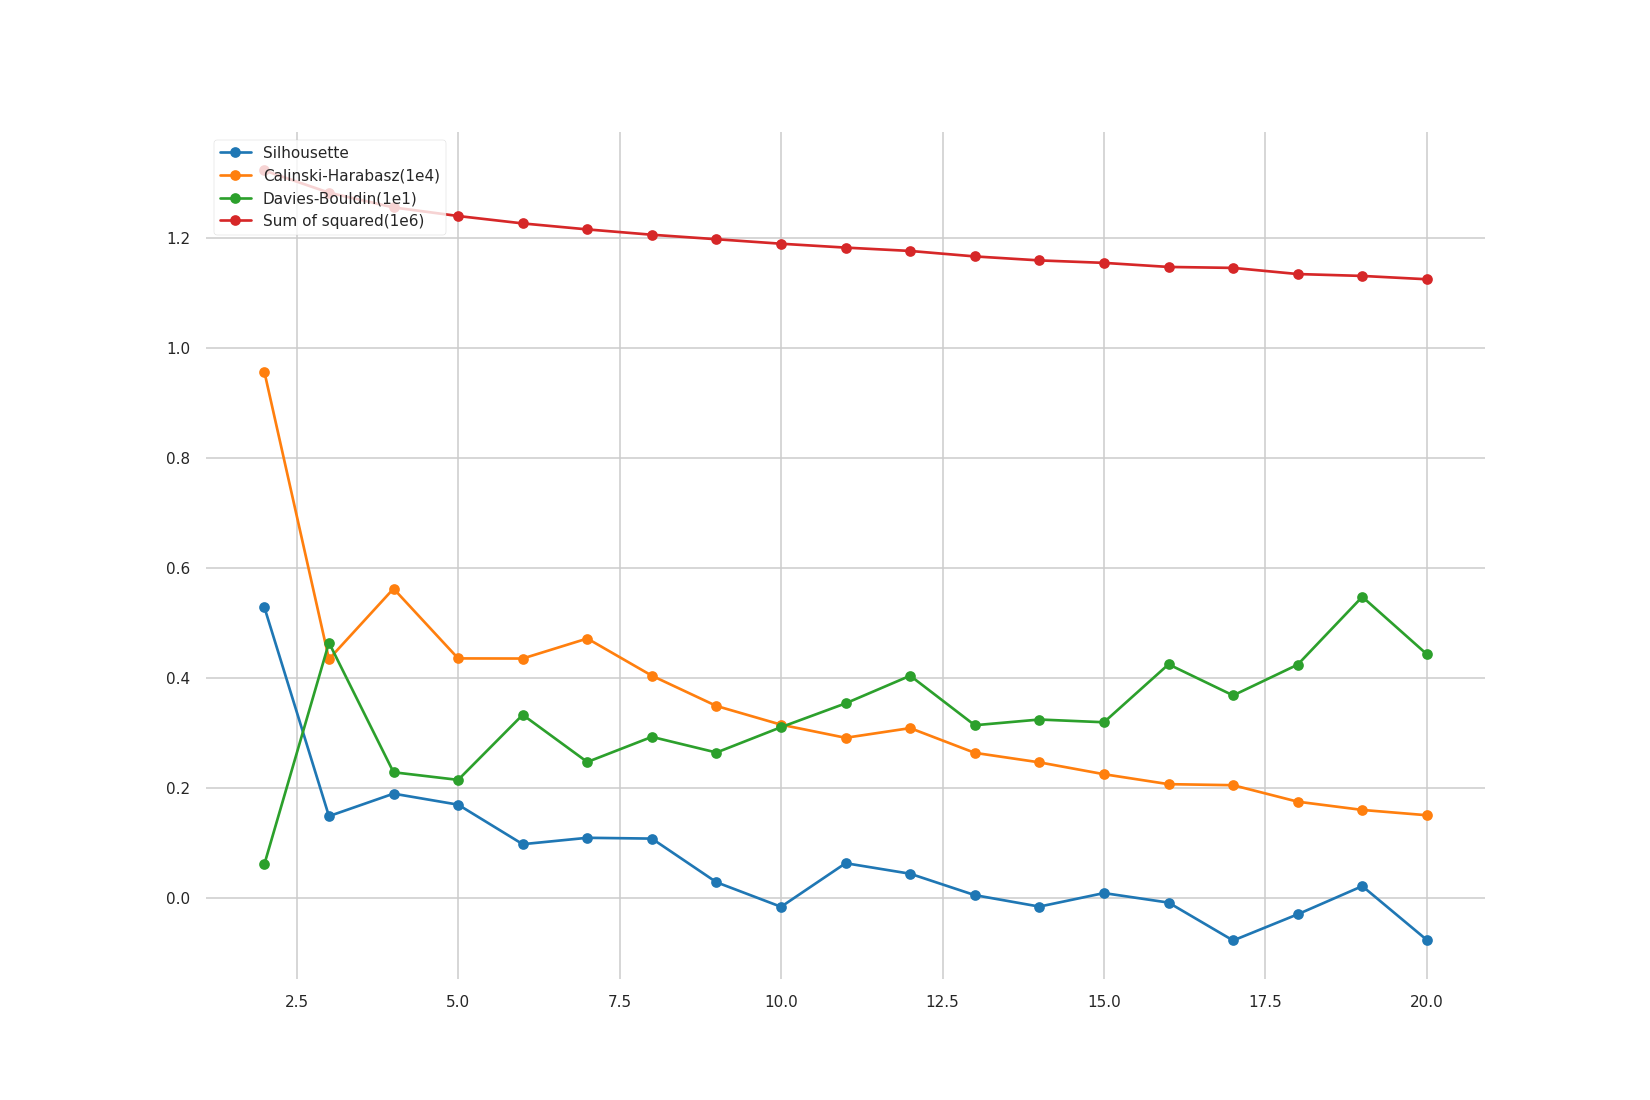

In [ ]:
plt.subplots(figsize=(15,10))
plt.plot(np.arange(2,21), np.array(sils), marker='o')
plt.plot(np.arange(2,21), np.array(chs)/1e4, marker='o')
plt.plot(np.arange(2,21), np.array(dbs)/1e1, marker='o')
plt.plot(np.arange(2,21), np.array(ssd)/1e6, marker='o')
plt.grid(True)
plt.legend(['Silhousette', 'Calinski-Harabasz(1e4)', 'Davies-Bouldin(1e1)','Sum of squared(1e6)'], loc='upper left')
plt.show()

### With 2 cluster

In [ ]:
kmeans = KMeans(n_clusters = 2, init='k-means++', n_init=20, max_iter=3000, verbose=1000, n_jobs=-1).fit(X_norm)
y_pred=kmeans.predict(X_norm)

In [ ]:
def plot_cluster(df, label, x_col, y_col):
#     cols=list(df.columns)
    markers=['bo', 'rs', 'g^', 'kP', 'y*']
    if type(df)==pd.core.frame.DataFrame:
        X=df.to_numpy()
    else:
        X=df
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    plt.subplots(figsize=(15,8))
    for i in np.unique(label):
        plt.plot(X[label == i, x_col], X[label==i, y_col], markers[i] , markersize = 10, alpha = .8, label=f'Cluster {i}')

    plt.legend(loc='center')
    plt.plot()
    plt.show()

<IPython.core.display.Javascript object>


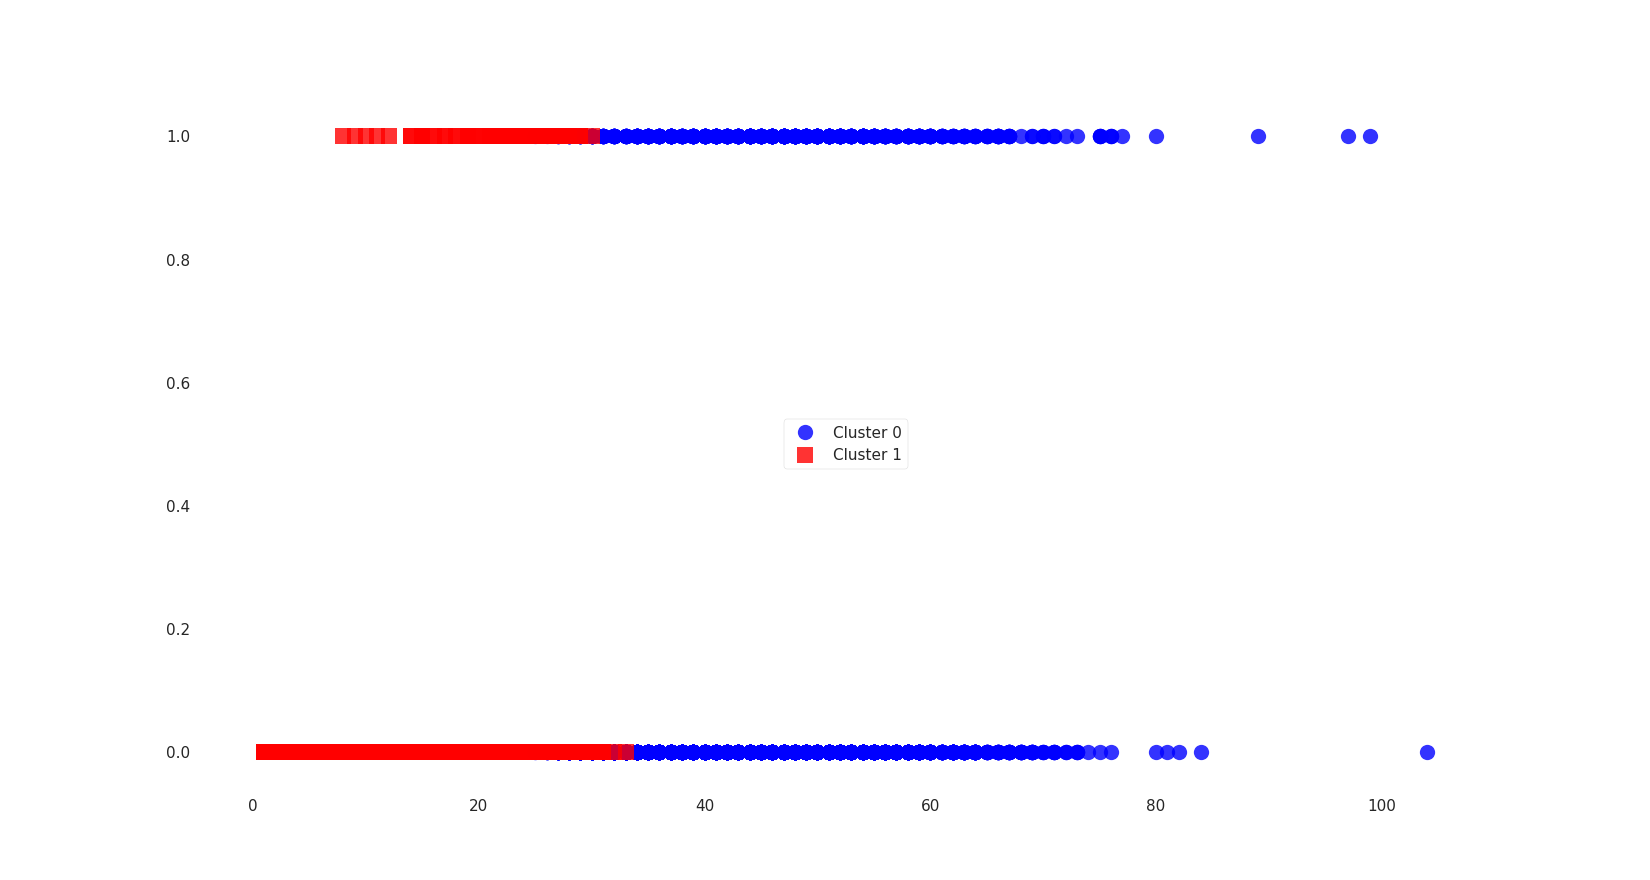

In [ ]:
plot_cluster(df, y_pred, 0, 1)

<IPython.core.display.Javascript object>


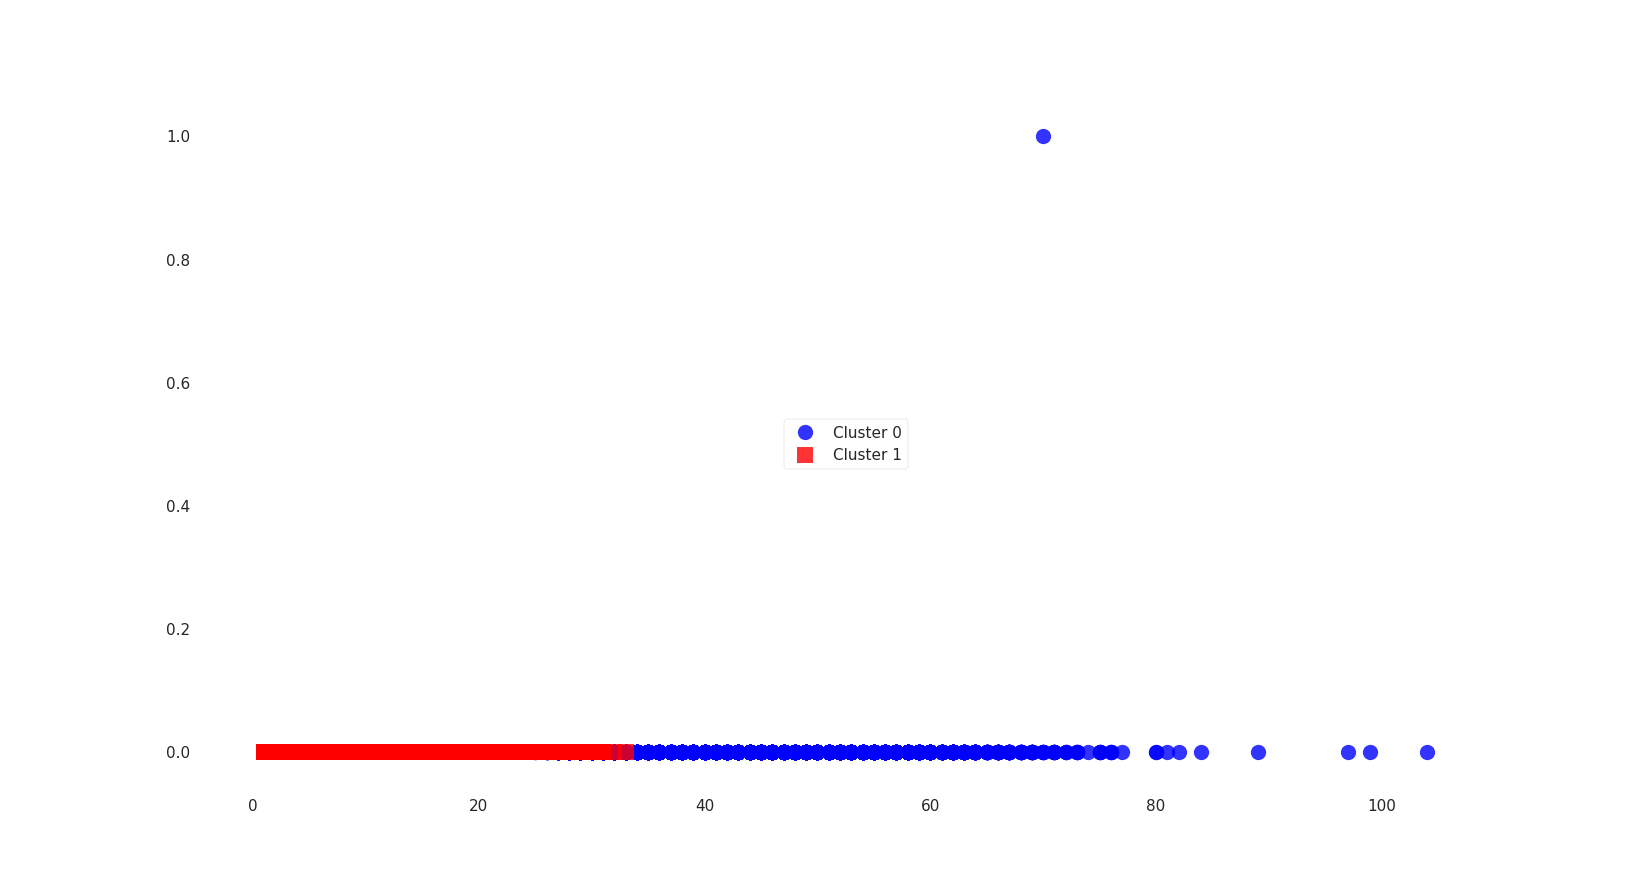

In [ ]:
plot_cluster(df, y_pred, 0, 2)

### With 4 cluster

<IPython.core.display.Javascript object>


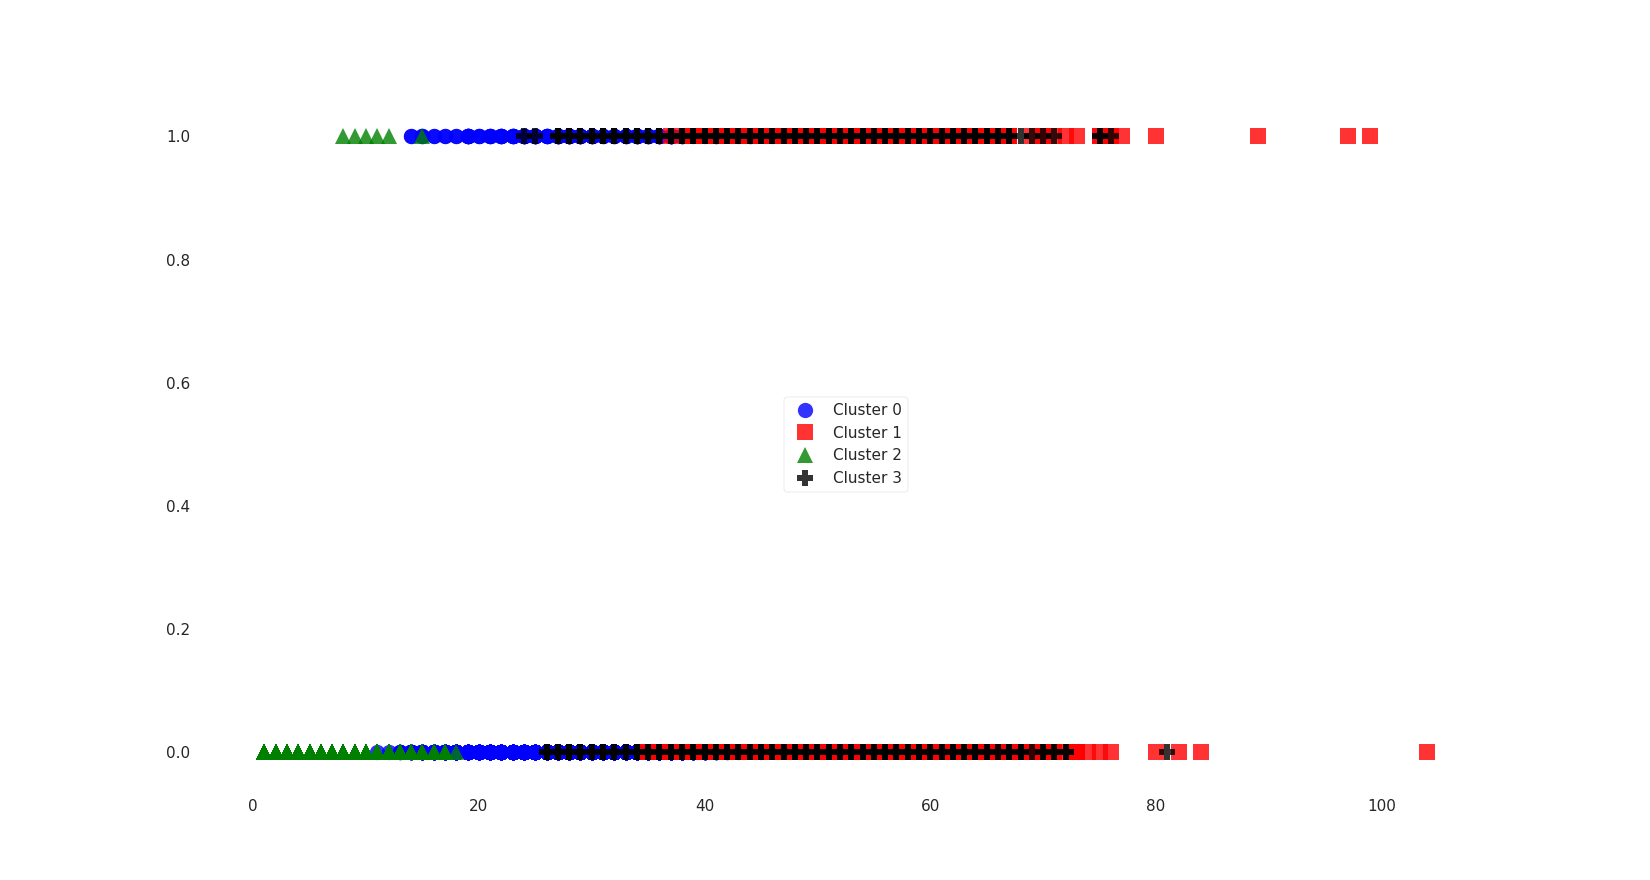

In [ ]:
kmeans = KMeans(n_clusters = 4, init='k-means++', n_init=20, max_iter=3000, verbose=1000, n_jobs=-1).fit(X_norm)
y_pred=kmeans.predict(X_norm)
plot_cluster(df, y_pred, 0, 1)

## DBSCAN with Hamming distance metric

Number of cluster founded=2
Number of noise points=254
Silhousette score=0.23432960049968068
Calinski-Harabasz score=713.6035667482087
Davies-Bouldin score=0.8184124125640669
Sum of squared distances=1124670.6545167202


<IPython.core.display.Javascript object>


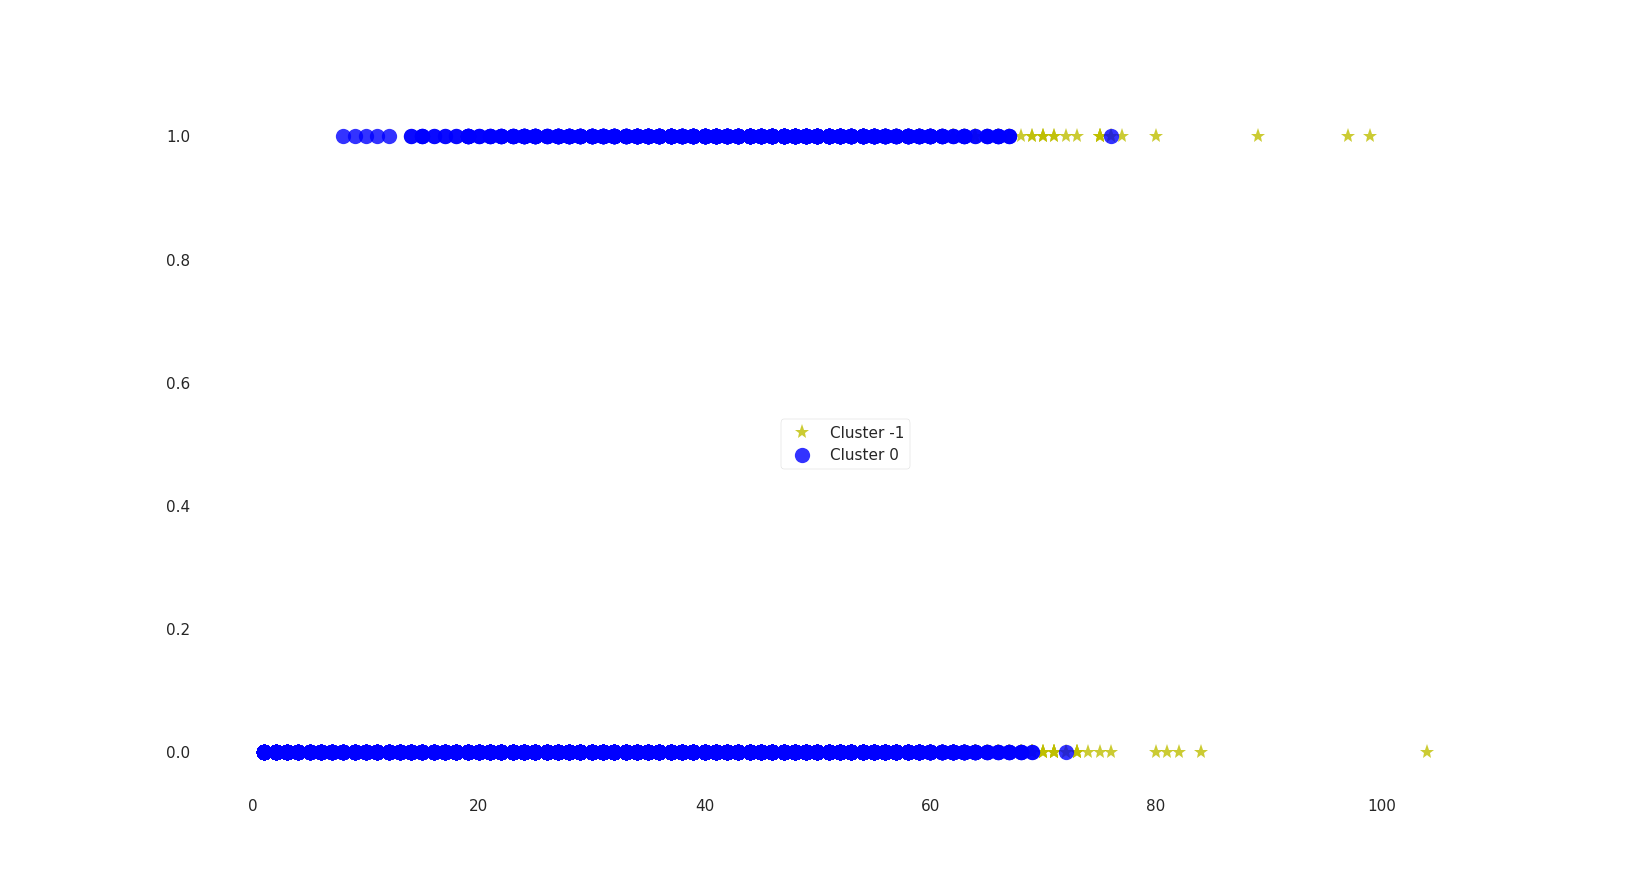

In [ ]:
kmeans = DBSCAN(eps=0.09, min_samples=100, metric='hamming', n_jobs=-1).fit(X[:, 1:])
labels = kmeans.labels_
print(f'Number of cluster founded={np.unique(labels).shape[0]}')
print(f'Number of noise points={np.sum((labels==-1).astype(np.int8))}')

sil_score=silhouette_score(df, labels, metric = 'hamming')
ch_score= calinski_harabasz_score(df, labels)
db_score= davies_bouldin_score(df, labels)

# "These below metrics is generally higher for convex clusters than
# other concepts of clusters, such as density based clusters like those obtained through DBSCAN."
print(f'Silhousette score={sil_score}')
print(f'Calinski-Harabasz score={ch_score}')
print(f'Davies-Bouldin score={db_score}')
print(f'Sum of squared distances={ssd_score}')
plot_cluster(df, labels, 0, 1)

# PCA features

In [ ]:
pca=PCA(n_components=3, svd_solver='full')
X_pca=pca.fit_transform(X[:, :])
print(X_pca.shape)
print(pca.explained_variance_ratio_)

(6340, 3)
[0.95077354 0.00611505 0.00201062]


In [ ]:
pca=PCA(n_components=3, svd_solver='full')
X_pca=pca.fit_transform(X[:, 1:])
print(X_pca.shape)
print(pca.explained_variance_ratio_)

(6340, 3)
[0.20115405 0.09979922 0.03230284]


-----------Analyzing on n_cluster=2
Silhousette score=0.5159307803838621
Calinski-Harabasz score=10182.398181291564
Davies-Bouldin score=0.6646442757212612
Sum of squared distances=19299.93934766195
-----------Analyzing on n_cluster=3
Silhousette score=0.16634824304703885
Calinski-Harabasz score=4810.838527589907
Davies-Bouldin score=4.7295890198831945
Sum of squared distances=12041.854641593094
-----------Analyzing on n_cluster=4
Silhousette score=0.17296435297627163
Calinski-Harabasz score=5378.455833138653
Davies-Bouldin score=1.7982602085452888
Sum of squared distances=9017.22475582887
-----------Analyzing on n_cluster=5
Silhousette score=0.11752524568041615
Calinski-Harabasz score=5527.174871740338
Davies-Bouldin score=4.176229598991772
Sum of squared distances=7359.6251223962845
-----------Analyzing on n_cluster=6
Silhousette score=0.11273837701907577
Calinski-Harabasz score=5479.68247493765
Davies-Bouldin score=2.1299846154560433
Sum of squared distances=6225.8999993002835
-----

<IPython.core.display.Javascript object>


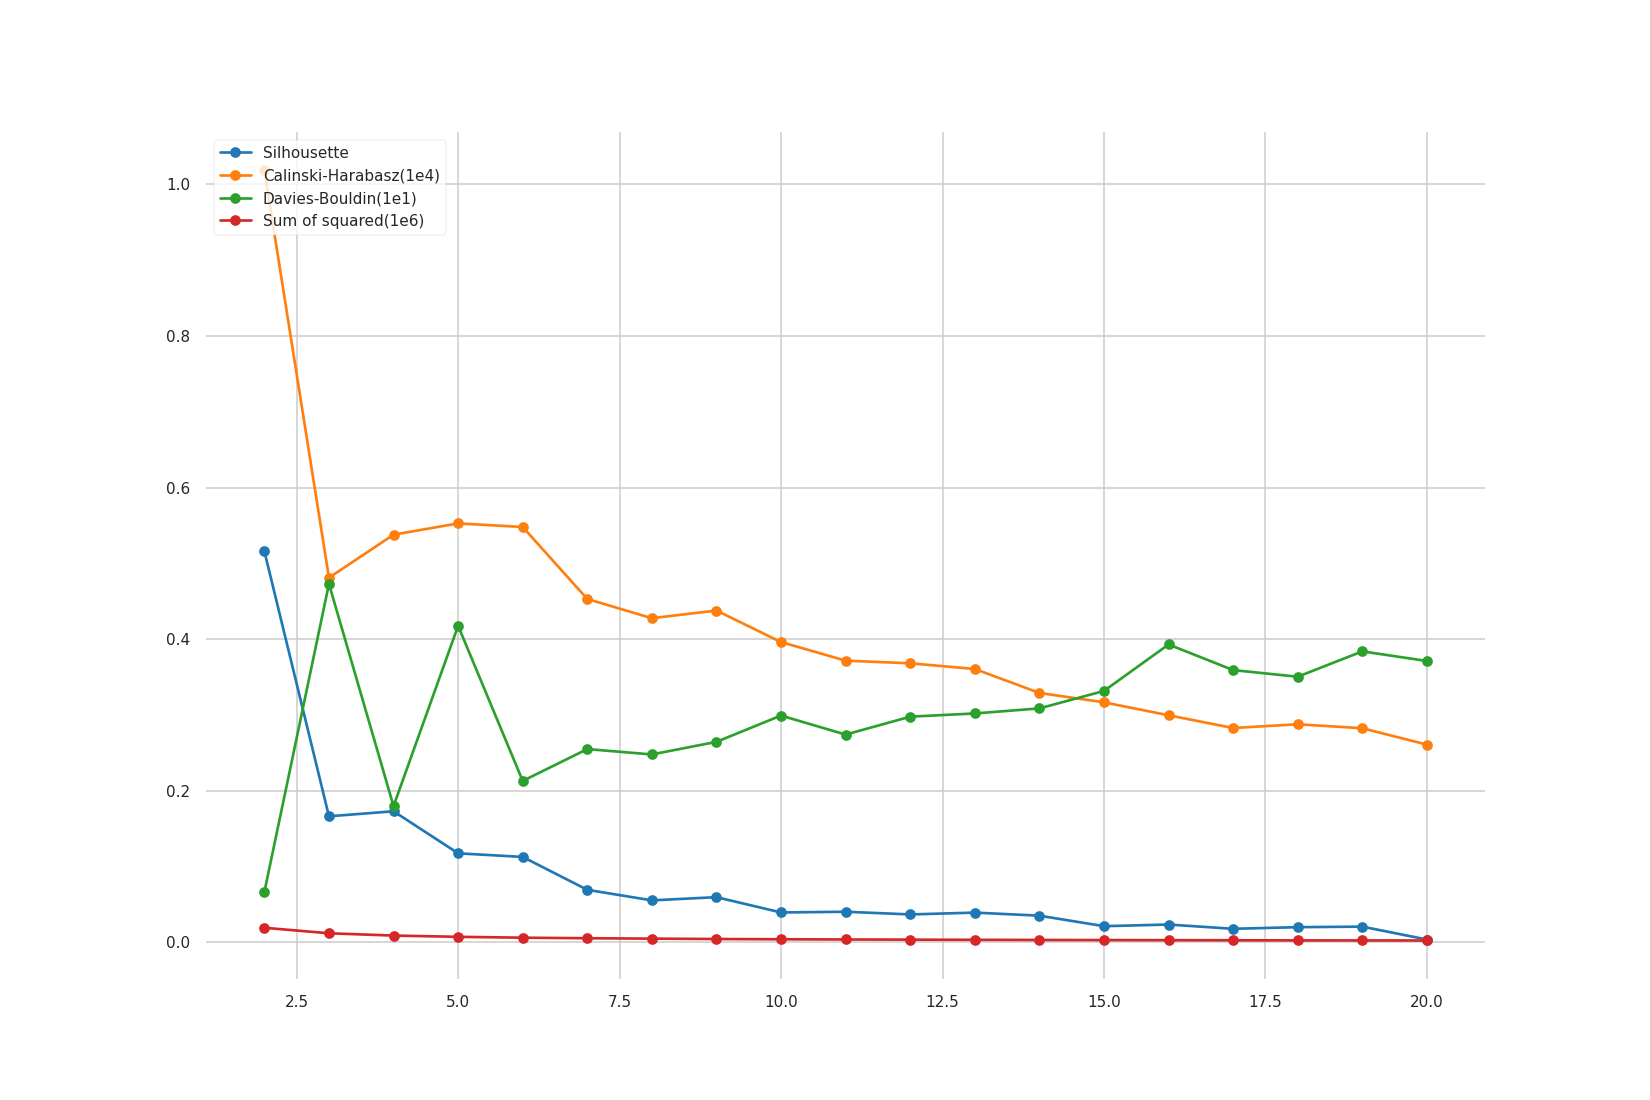

In [ ]:
ssd=[]
sils = []
chs=[]
dbs=[]

MAX_NCLUSTER = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for i in range(2, MAX_NCLUSTER+1):
    print(f'-----------Analyzing on n_cluster={i}')
    kmeans = KMeans(n_clusters = i, init='k-means++', n_init=20, max_iter=3000, verbose=10, n_jobs=-1).fit(X_pca)
    labels = kmeans.labels_
    ssd_score=kmeans.inertia_
    sil_score=silhouette_score(df, labels, metric = 'euclidean')
    ch_score= calinski_harabasz_score(df, labels)
    db_score= davies_bouldin_score(df, labels)
    print(f'Silhousette score={sil_score}')
    print(f'Calinski-Harabasz score={ch_score}')
    print(f'Davies-Bouldin score={db_score}')
    print(f'Sum of squared distances={ssd_score}')
    sils.append(sil_score)
    ssd.append(ssd_score)
    chs.append(ch_score)
    dbs.append(db_score)
plt.subplots(figsize=(15,10))
plt.plot(np.arange(2,21), np.array(sils), marker='o')
plt.plot(np.arange(2,21), np.array(chs)/1e4, marker='o')
plt.plot(np.arange(2,21), np.array(dbs)/1e1, marker='o')
plt.plot(np.arange(2,21), np.array(ssd)/1e6, marker='o')
plt.grid(True)
plt.legend(['Silhousette', 'Calinski-Harabasz(1e4)', 'Davies-Bouldin(1e1)','Sum of squared(1e6)'], loc='upper left')
plt.show()

## With k-means model trained with all features

<IPython.core.display.Javascript object>


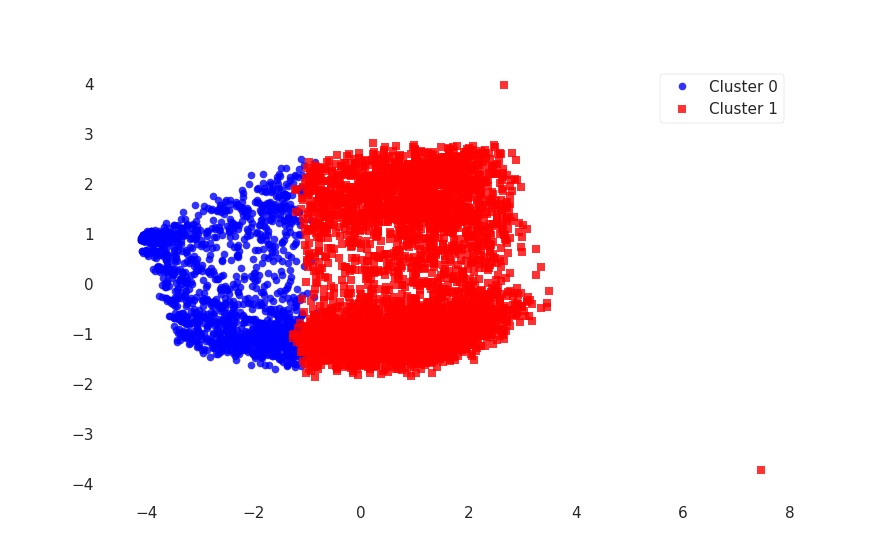

<IPython.core.display.Javascript object>


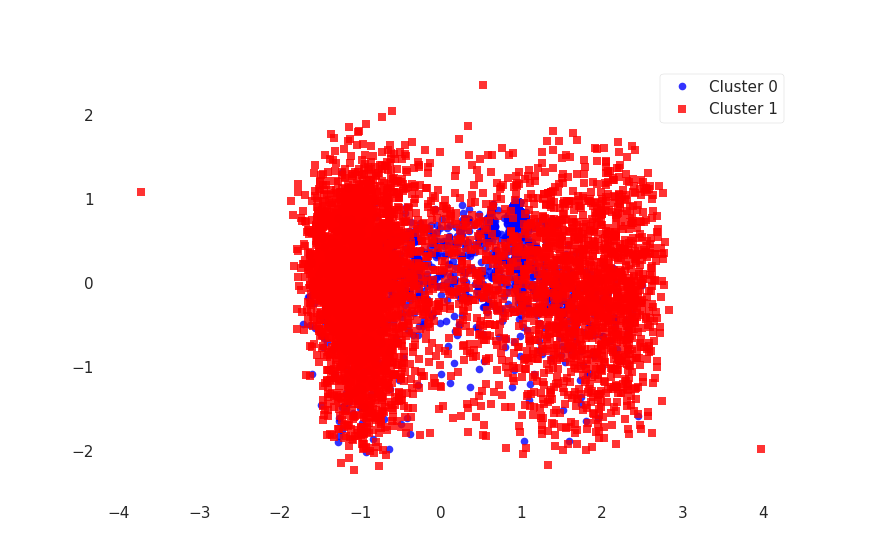

<IPython.core.display.Javascript object>


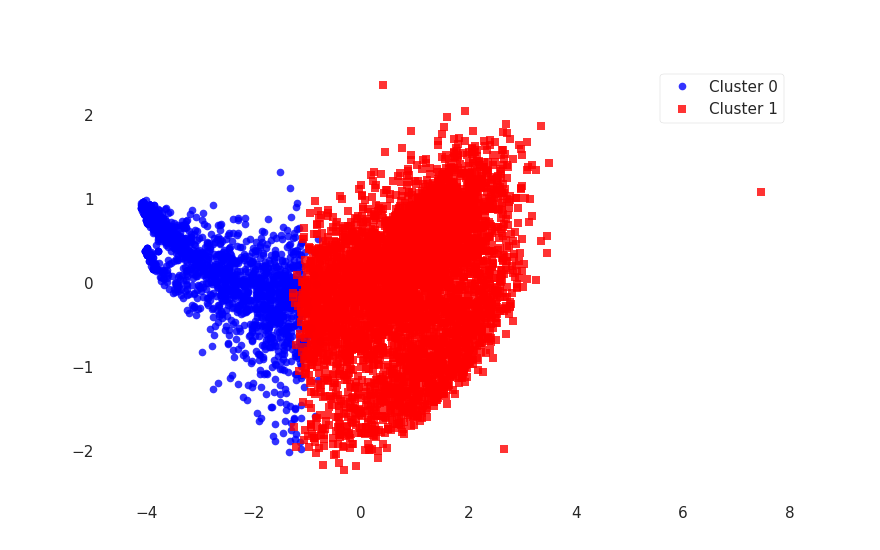

In [ ]:
kmeans = KMeans(n_clusters = 2, init='k-means++', n_init=20, max_iter=3000, verbose=1000, n_jobs=-1).fit(X_norm)
labels=kmeans.labels_
plt.subplots(figsize=(8,5))
markers=['bo', 'rs', 'g^', 'kP', 'y*']
for i in [0, 1]:
    plt.plot(X_pca[labels==i, 0], X_pca[labels==i, 1], markers[i] , markersize = 5, alpha = .8, label=f'Cluster {i}')
plt.legend(loc='upper right')
plt.plot()
plt.show()

plt.subplots(figsize=(8,5))
for i in [0, 1]:
    plt.plot(X_pca[labels==i, 1], X_pca[labels==i, 2], markers[i] , markersize = 5, alpha = .8, label=f'Cluster {i}')
plt.legend(loc='upper right')
plt.plot()
plt.show()

plt.subplots(figsize=(8,5))
for i in [0, 1]:
    plt.plot(X_pca[labels==i, 0], X_pca[labels==i, 2], markers[i] , markersize = 5, alpha = .8, label=f'Cluster {i}')
plt.legend(loc='upper right')
plt.plot()
plt.show()

## With k-means model trained with pca features (3-dimensions)

<IPython.core.display.Javascript object>


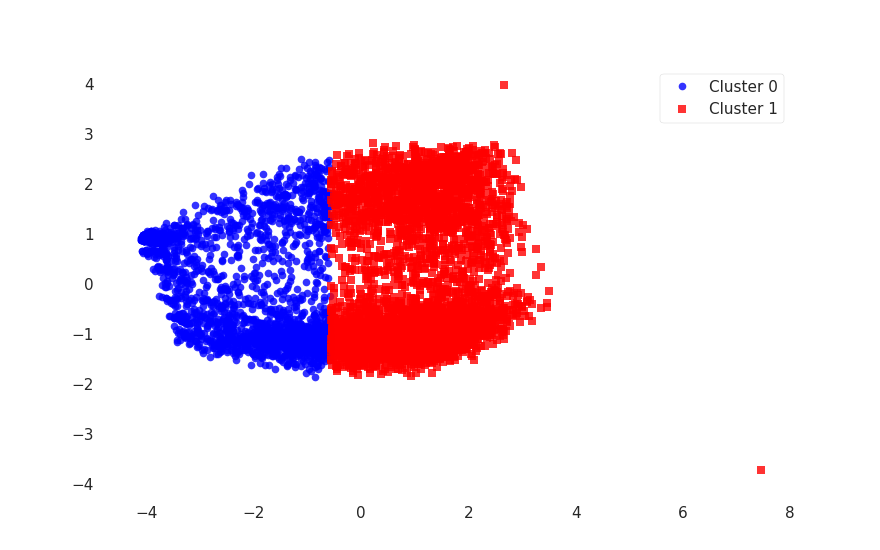

<IPython.core.display.Javascript object>


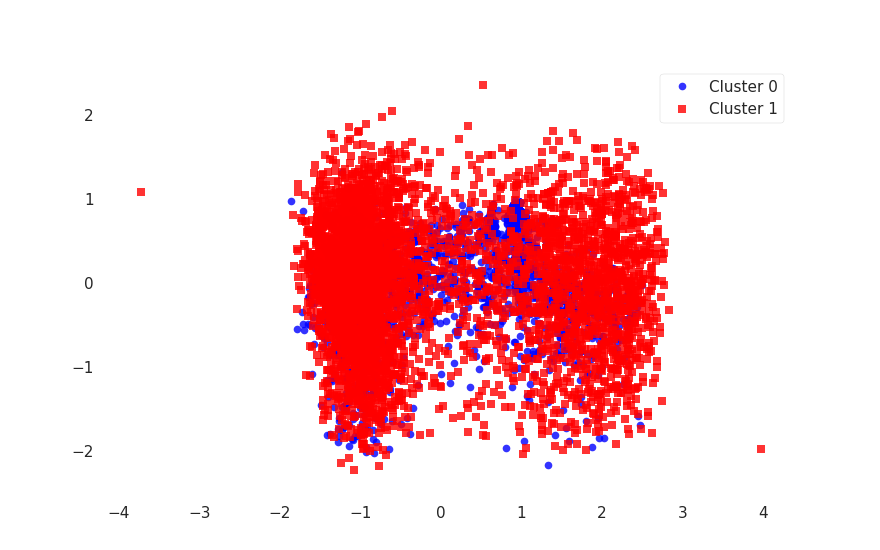

<IPython.core.display.Javascript object>


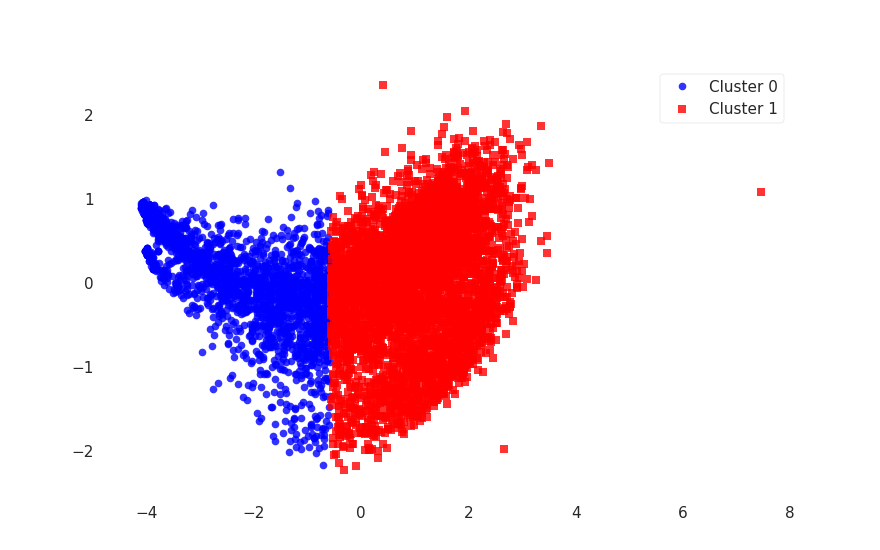

In [ ]:
kmeans = KMeans(n_clusters = 2, init='k-means++', n_init=20, max_iter=3000, verbose=1000, n_jobs=-1).fit(X_pca)
labels=kmeans.labels_
plt.subplots(figsize=(8,5))
markers=['bo', 'rs', 'g^', 'kP', 'y*']
for i in [0, 1]:
    plt.plot(X_pca[labels==i, 0], X_pca[labels==i, 1], markers[i] , markersize = 5, alpha = .8, label=f'Cluster {i}')
plt.legend(loc='upper right')
plt.plot()
plt.show()

plt.subplots(figsize=(8,5))
for i in [0, 1]:
    plt.plot(X_pca[labels==i, 1], X_pca[labels==i, 2], markers[i] , markersize = 5, alpha = .8, label=f'Cluster {i}')
plt.legend(loc='upper right')
plt.plot()
plt.show()

plt.subplots(figsize=(8,5))
for i in [0, 1]:
    plt.plot(X_pca[labels==i, 0], X_pca[labels==i, 2], markers[i] , markersize = 5, alpha = .8, label=f'Cluster {i}')
plt.legend(loc='upper right')
plt.plot()
plt.show()

<IPython.core.display.Javascript object>


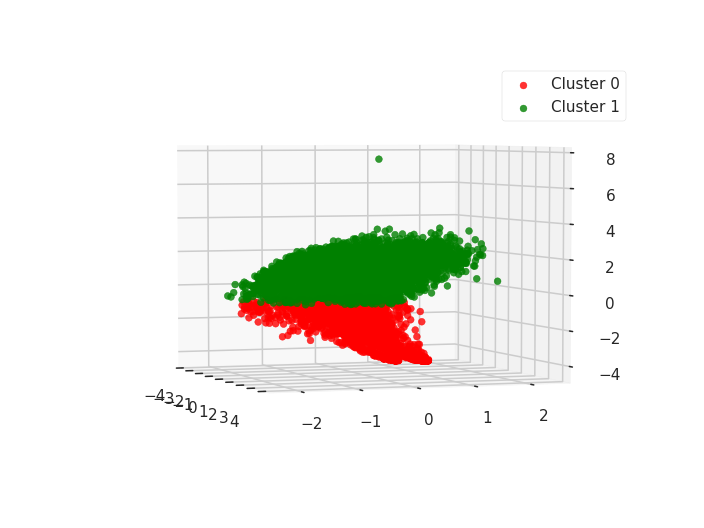

In [ ]:
fig = plt.figure()
ax = plt.axes(projection="3d")
colors=['r', 'g', 'b', 'y']
for i in [0,1]:
    z_points = X_pca[labels==i, 0]
    x_points = X_pca[labels==i, 1]
    y_points = X_pca[labels==i, 2]
    ax.scatter3D(x_points, y_points, z_points, marker='o', c=colors[i], alpha = .8, label=f'Cluster {i}');
plt.legend(loc='upper right')
plt.show()